## Data exploration

This script performs some data exploration to see, what kind of data our data set contains.

In [2]:
import pandas as pd
import pathlib

from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import os
import sys
sys.path.append(os.path.abspath('configs'))
from config import *

path = pathlib.Path.cwd()
data_path = path / "CompiledDataSet" / "Cassini_CDA_Events_V0.csv"

df = pd.read_csv(data_path, index_col=0, parse_dates=["EVENT_TIME"])
df.head()

C:\Users\jerem\AppData\Local\Temp\ipykernel_20340\511845337.py:18: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, index_col=0, parse_dates=["EVENT_TIME"])


,EVENT_ID,EVENT_TIME,EVENT_JULIAN_DATE,QP_AMPLITUDE,QP_SIGNAL_FLAG,QI_AMPLITUDE,QI_SIGNAL_FLAG,QT_AMPLITUDE,QT_SIGNAL_FLAG,QC_AMPLITUDE,...,EVENT_QUALITY,PARTICLE_SPEED,PARTICLE_SPEED_FACTOR,PARTICLE_MASS,PARTICLE_MASS_FACTOR,PARTICLE_CHARGE,PARTICLE_CHARGE_ERROR,SPECTRUM_FLAG,SOURCE_VOLUME,SOURCE_FILE
0,398120,2005-01-01 00:02:42,2.453372e+06,0.0,1,0.0,1,5.800000e-15,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,COCDA_0007,CDAEVENTS_05001_05090.TAB
1,398121,2005-01-01 00:04:55,2.453372e+06,0.0,1,0.0,1,4.700000e-15,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,COCDA_0007,CDAEVENTS_05001_05090.TAB
2,398122,2005-01-01 00:07:36,2.453372e+06,0.0,1,0.0,1,0.000000e+00,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,COCDA_0007,CDAEVENTS_05001_05090.TAB
3,398123,2005-01-01 00:09:24,2.453372e+06,0.0,1,0.0,1,0.000000e+00,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,COCDA_0007,CDAEVENTS_05001_05090.TAB
4,398124,2005-01-01 00:13:05,2.453372e+06,0.0,1,0.0,1,1.700000e-14,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,COCDA_0007,CDAEVENTS_05001_05090.TAB


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367995 entries, 0 to 367994
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   EVENT_ID               367995 non-null  int64         
 1   EVENT_TIME             367995 non-null  datetime64[ns]
 2   EVENT_JULIAN_DATE      367995 non-null  float64       
 3   QP_AMPLITUDE           367995 non-null  float64       
 4   QP_SIGNAL_FLAG         367995 non-null  int64         
 5   QI_AMPLITUDE           367995 non-null  float64       
 6   QI_SIGNAL_FLAG         367995 non-null  int64         
 7   QT_AMPLITUDE           367995 non-null  float64       
 8   QT_SIGNAL_FLAG         367995 non-null  int64         
 9   QC_AMPLITUDE           367995 non-null  float64       
 10  QC_SIGNAL_FLAG         367995 non-null  int64         
 11  QI_RISE_TIME           250977 non-null  float64       
 12  QT_RISE_TIME           247005 non-null  float64  

In [4]:
# Drop empty or irrelevant columns
drop = [
    "EVENT_QUALITY",
    "PARTICLE_SPEED",
    "PARTICLE_SPEED_FACTOR",
    "PARTICLE_MASS",
    "PARTICLE_MASS_FACTOR",
    "PARTICLE_CHARGE",
    "PARTICLE_CHARGE_ERROR",
    "EVENT_JULIAN_DATE", 
    "COUNTER_NUMBER", 
    "SPECTRUM_FLAG",
    "TARGET_FLAG"
]
df = df.drop(columns=drop)
df.to_csv("CompiledDataSet/Cassini_CDA_Events_V1.csv", index=True)

df.describe()

,EVENT_ID,EVENT_TIME,QP_AMPLITUDE,QP_SIGNAL_FLAG,QI_AMPLITUDE,QI_SIGNAL_FLAG,QT_AMPLITUDE,QT_SIGNAL_FLAG,QC_AMPLITUDE,QC_SIGNAL_FLAG,...,SPACECRAFT_DEC,SC_SUN_DIST,SC_SIII_LONG,SC_SIII_LAT,SC_SAT_DIST,SC_X_VEL,SC_Y_VEL,SC_Z_VEL,DETECTOR_RA,DETECTOR_DEC
count,3.679950e+05,367995,3.679950e+05,367995.000000,3.679950e+05,367995.000000,3.679950e+05,367995.000000,3.679950e+05,367995.000000,...,281205.000000,281205.000000,281205.000000,281205.000000,281205.000000,281205.000000,281205.000000,281205.000000,367995.000000,367985.000000
mean,1.680995e+06,2010-08-26 18:00:10.622241792,-1.653613e-18,1.114480,-4.891433e+18,0.880322,-4.348081e+23,0.847430,-8.236718e+32,0.847430,...,6.250790,9.395679,185.113735,3.386747,17.527192,-0.733024,-6.872356,-3.533776,180.153513,8.667169
min,2.070030e+05,2005-01-01 00:02:42,-2.700000e-14,0.000000,-1.800000e+24,0.000000,-1.600000e+29,0.000000,-3.000000e+38,0.000000,...,-8.290000,9.048600,0.000000,-74.460000,2.630000,-26.120000,-21.950000,-18.560000,0.000000,-88.900000
25%,1.410954e+06,2008-03-26 14:57:24.500000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,...,-5.160000,9.273900,76.040000,-0.220000,6.290000,-7.620000,-10.190000,-4.480000,80.060000,-14.410000
50%,1.819777e+06,2010-06-19 14:42:44,0.000000e+00,1.000000,1.500000e-15,1.000000,3.800000e-15,1.000000,2.000000e-15,1.000000,...,8.960000,9.332100,178.550000,0.170000,14.030000,-0.480000,-6.410000,-3.110000,171.910000,3.480000
75%,2.153278e+06,2012-05-20 08:39:48.500000,0.000000e+00,1.000000,2.900000e-14,1.000000,4.700000e-15,1.000000,3.300000e-15,1.000000,...,11.110000,9.656400,297.120000,9.110000,21.540000,6.280000,-1.850000,-1.190000,284.515000,33.050000
max,2.625995e+06,2016-01-01 00:00:44,9.600000e-15,9.000000,1.400000e+19,1.000000,1.300000e-08,1.000000,1.000000e-08,1.000000,...,21.440000,9.733700,360.000000,74.450000,59.630000,22.810000,10.450000,4.580000,360.000000,89.810000
std,7.817896e+05,NaN,1.240596e-16,1.491963,2.967232e+21,0.324585,2.637540e+26,0.359573,4.945430e+35,0.359573,...,10.406786,0.237769,112.940893,17.324749,13.836366,9.967545,6.615934,3.623890,113.057661,37.731299


In [5]:
# Include only numeric columns for now
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.head()

,EVENT_ID,QP_AMPLITUDE,QP_SIGNAL_FLAG,QI_AMPLITUDE,QI_SIGNAL_FLAG,QT_AMPLITUDE,QT_SIGNAL_FLAG,QC_AMPLITUDE,QC_SIGNAL_FLAG,QI_RISE_TIME,...,SPACECRAFT_DEC,SC_SUN_DIST,SC_SIII_LONG,SC_SIII_LAT,SC_SAT_DIST,SC_X_VEL,SC_Y_VEL,SC_Z_VEL,DETECTOR_RA,DETECTOR_DEC
0,398120,0.0,1,0.0,1,5.800000e-15,1,0.0,1,NaN,...,21.44,9.0501,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25
1,398121,0.0,1,0.0,1,4.700000e-15,1,0.0,1,NaN,...,21.44,9.0501,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.60,59.23
2,398122,0.0,1,0.0,1,0.000000e+00,1,0.0,1,NaN,...,21.44,9.0501,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.91,59.21
3,398123,0.0,1,0.0,1,0.000000e+00,1,0.0,1,NaN,...,21.44,9.0501,223.44,12.46,59.63,-8.38,-4.45,-1.08,68.19,59.30
4,398124,0.0,1,0.0,1,1.700000e-14,1,0.0,1,NaN,...,21.44,9.0501,223.45,12.46,59.63,-8.38,-4.45,-1.08,68.68,59.29


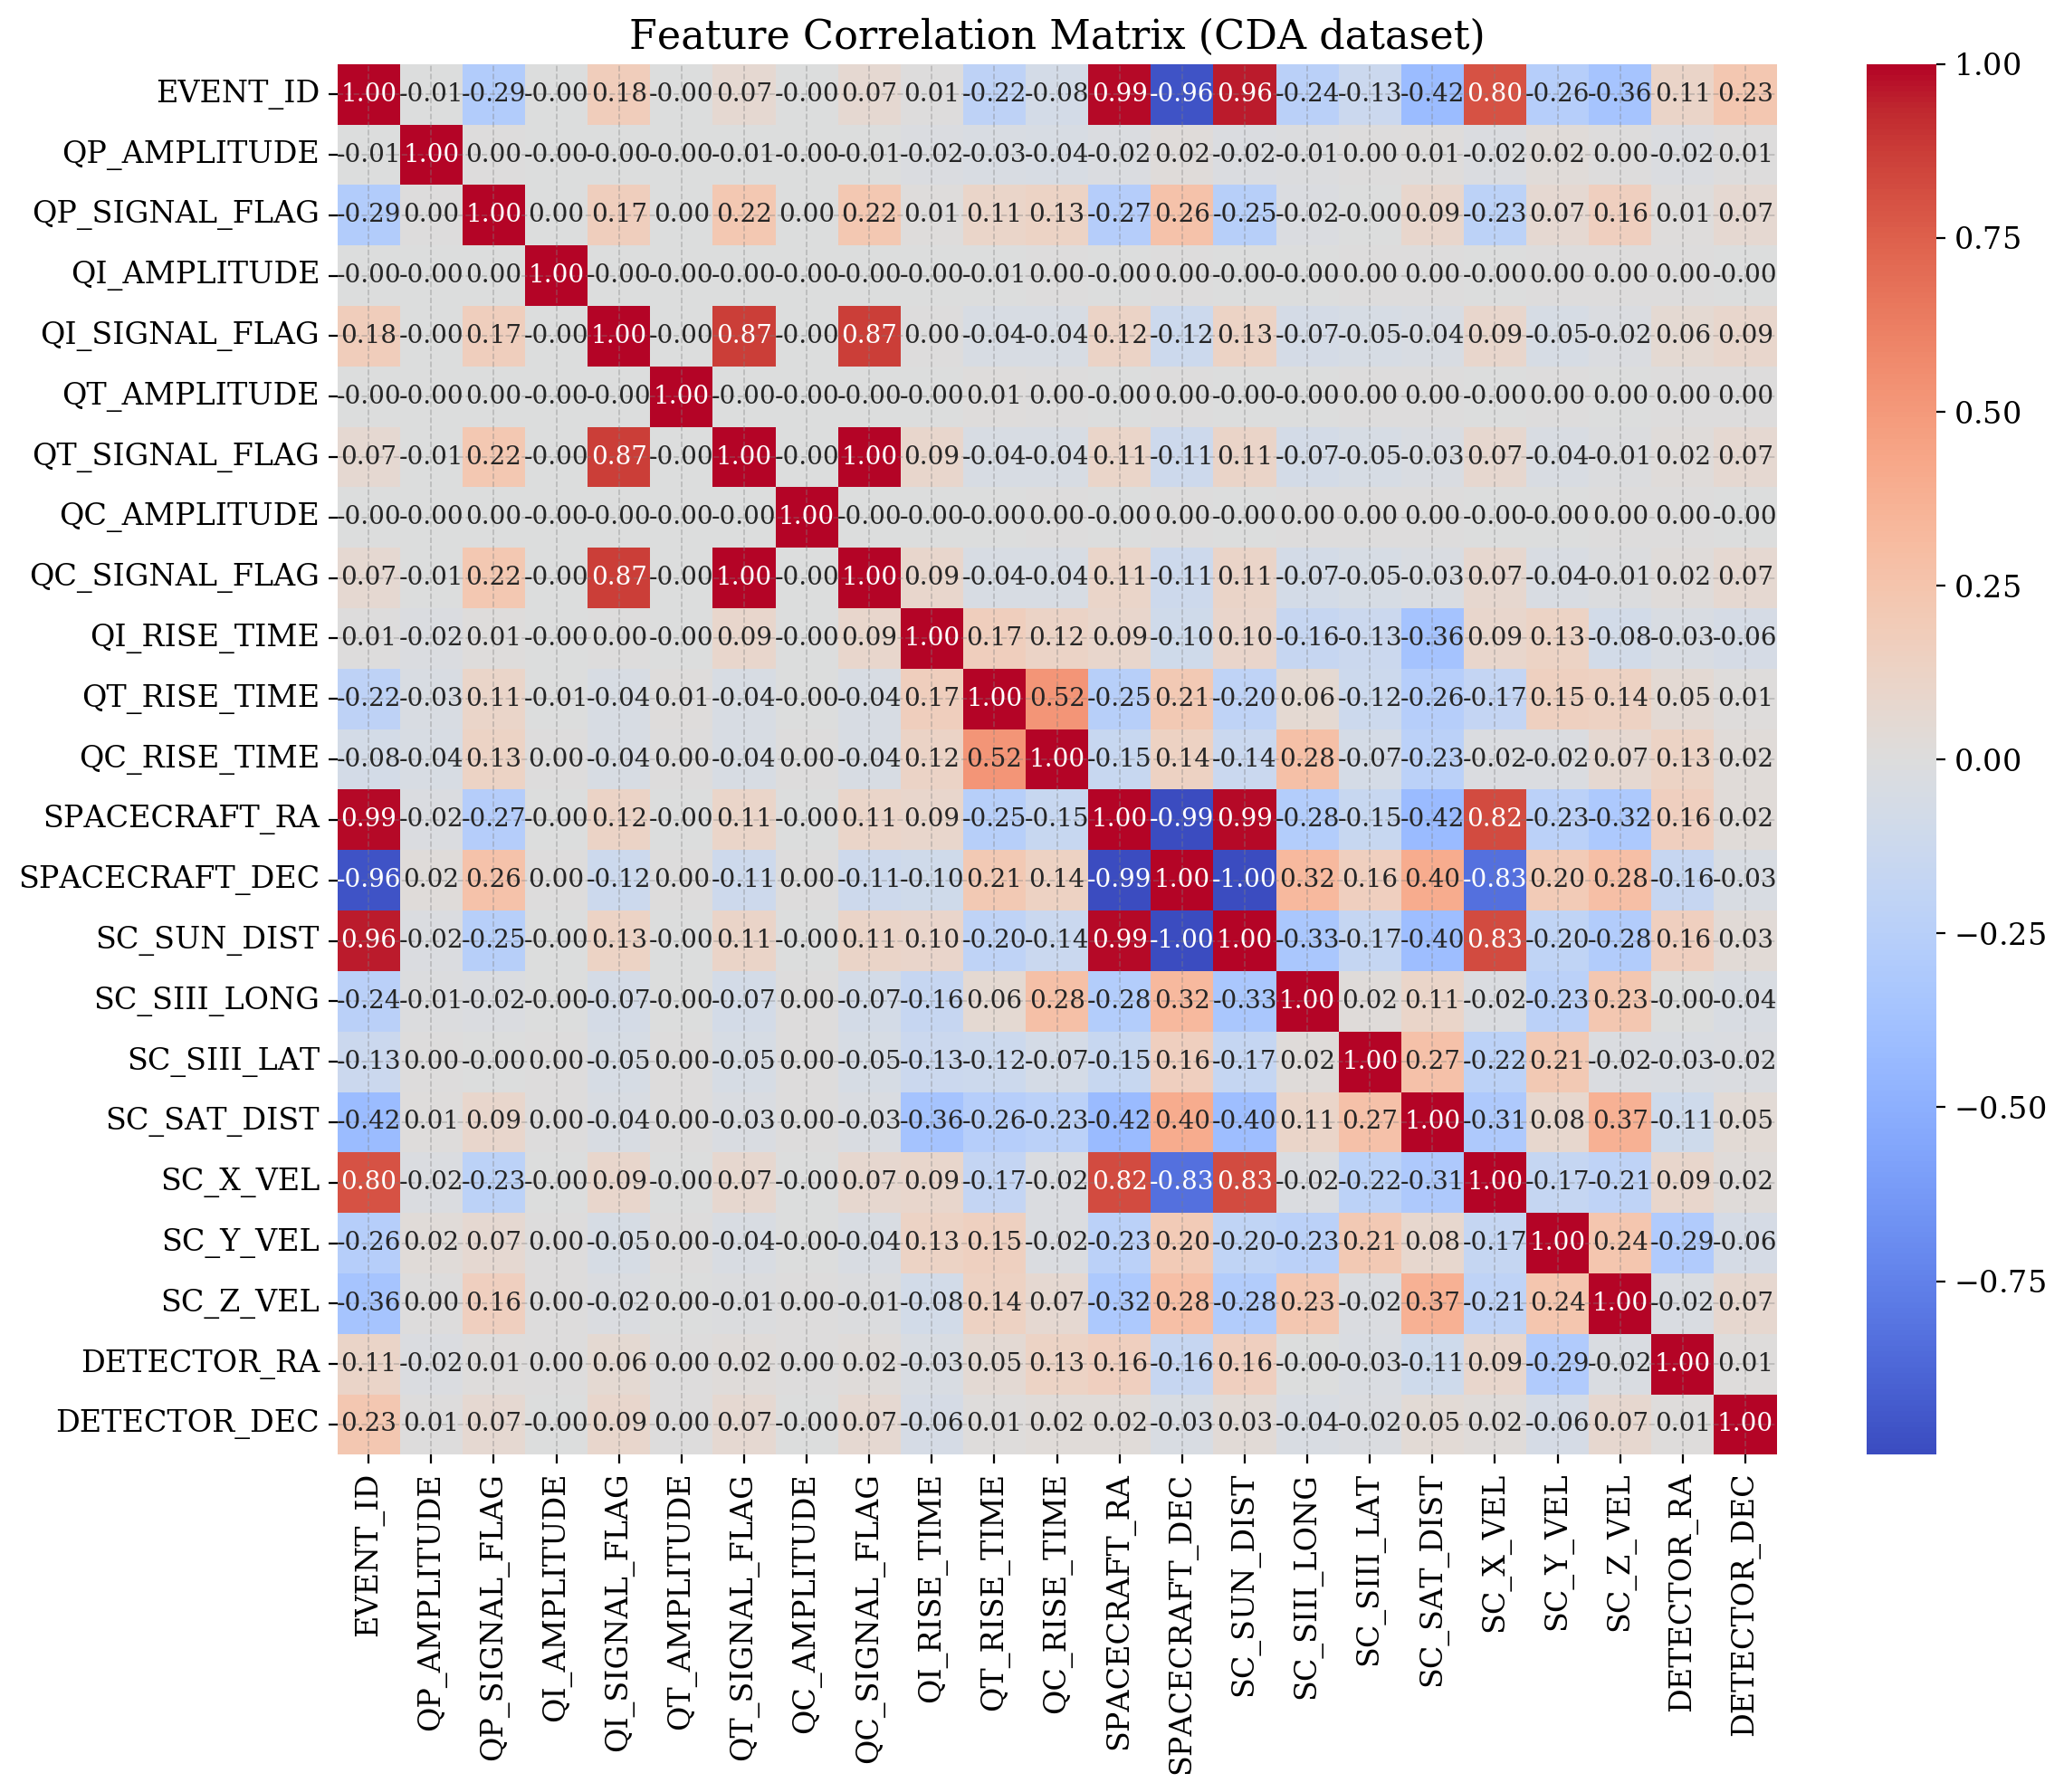

In [6]:
# Correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix (CDA dataset)")
plt.show()

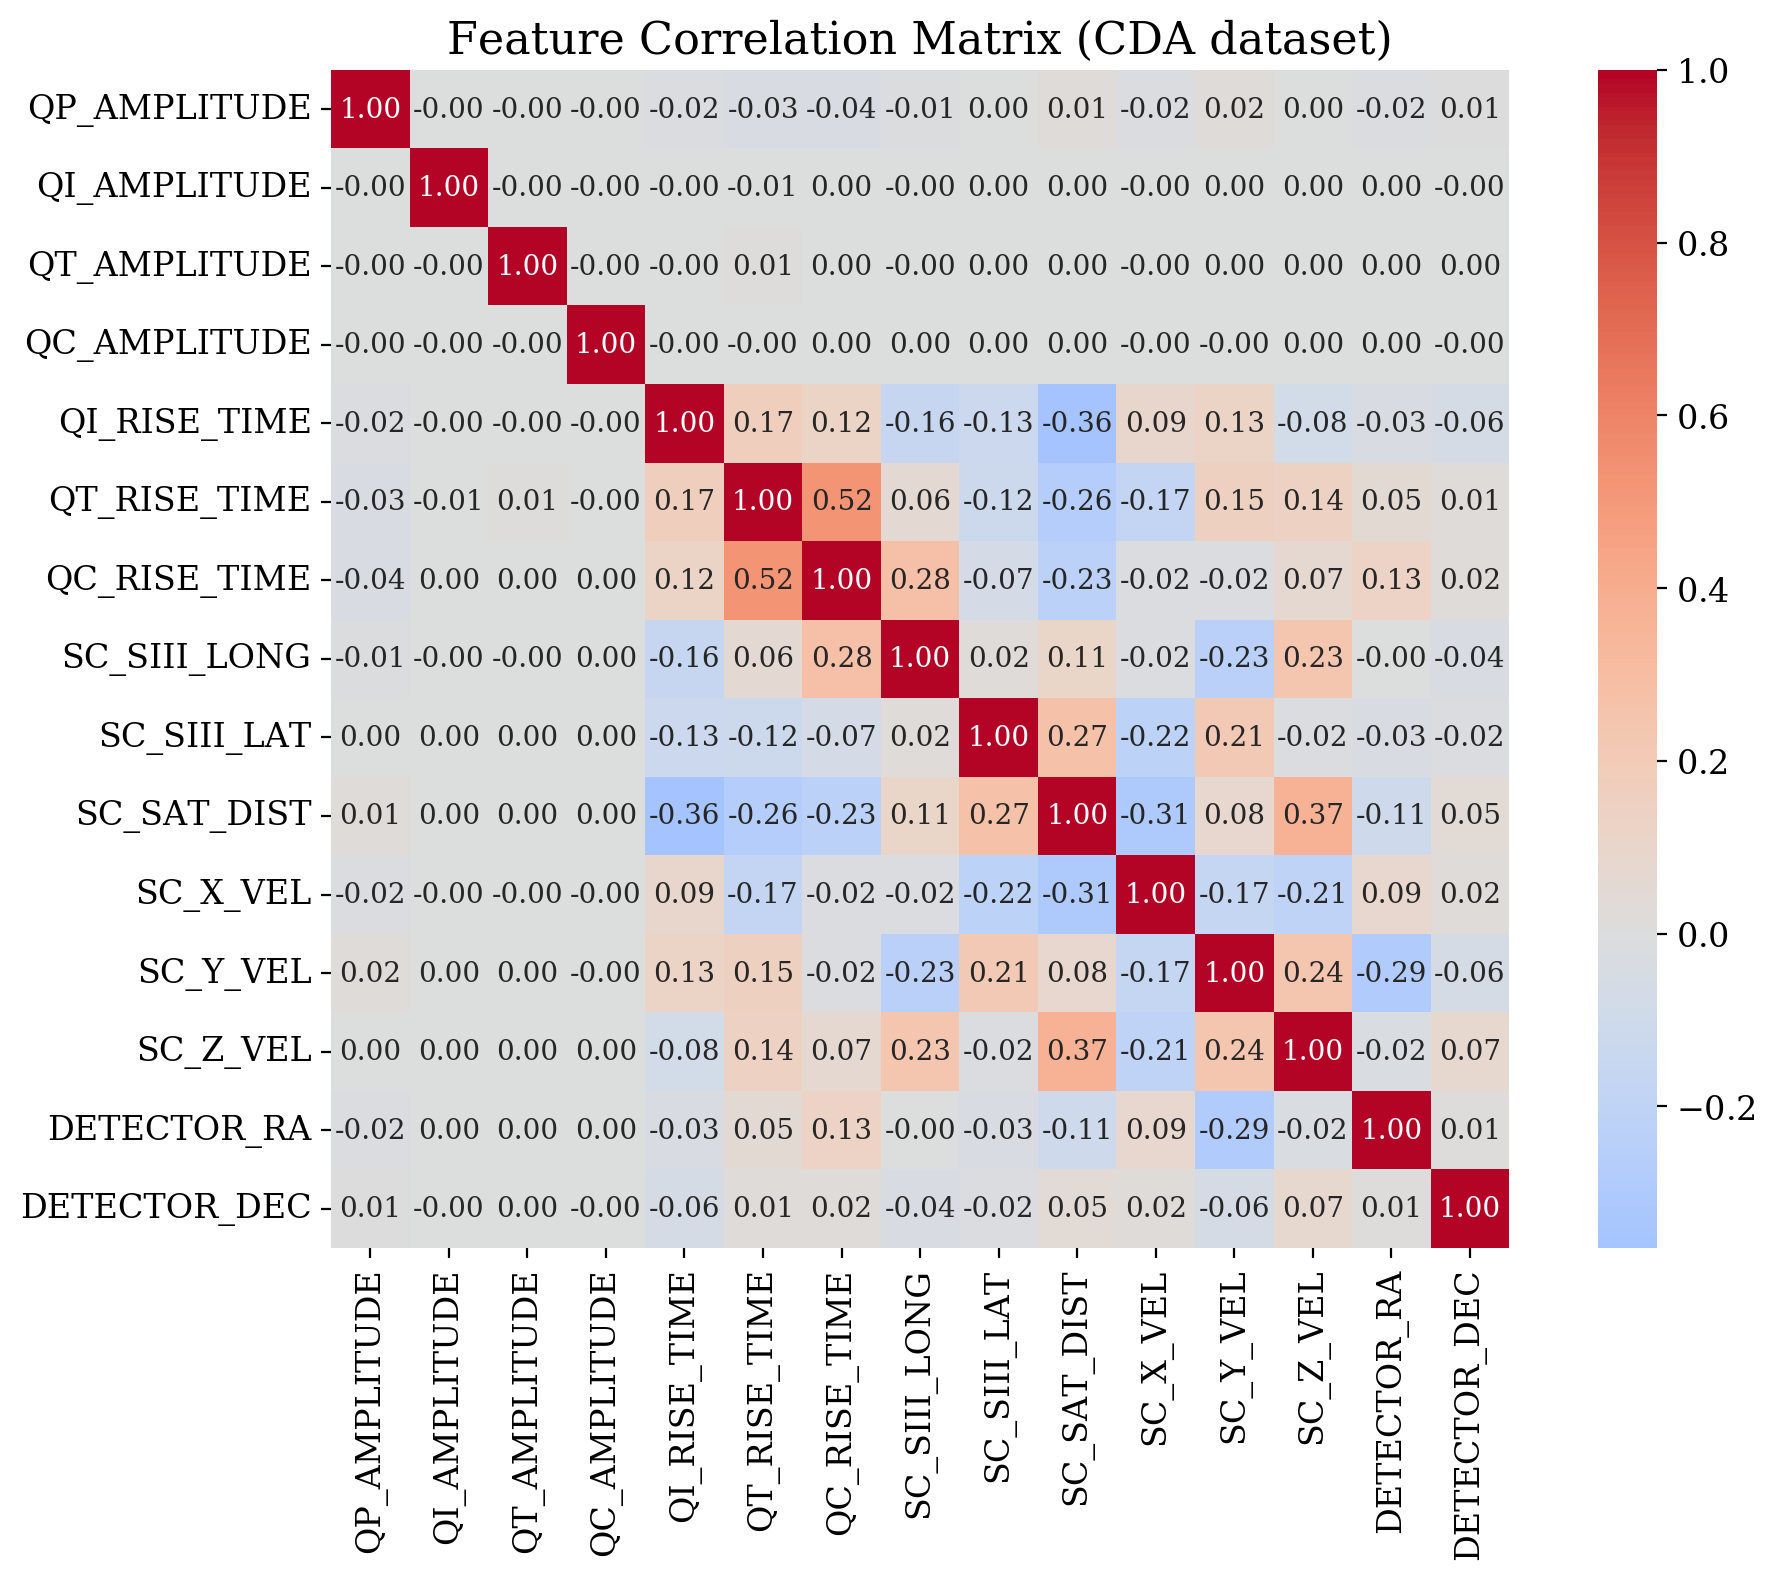

In [7]:
cols_of_interest = [
    "QP_AMPLITUDE",
    'QI_AMPLITUDE',
    'QT_AMPLITUDE',
    'QC_AMPLITUDE',
    "QI_RISE_TIME",
    "QT_RISE_TIME",
    "QC_RISE_TIME",
    "SC_SIII_LONG",
    "SC_SIII_LAT",
    "SC_SAT_DIST",
    "SC_X_VEL",
    "SC_Y_VEL",
    "SC_Z_VEL",
    "DETECTOR_RA",
    "DETECTOR_DEC"
]
# Assuming 'correlation_matrix' already exists
subset_correlation = correlation_matrix.loc[cols_of_interest, cols_of_interest]
plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.grid(False)
plt.title("Feature Correlation Matrix (CDA dataset)")
plt.show()

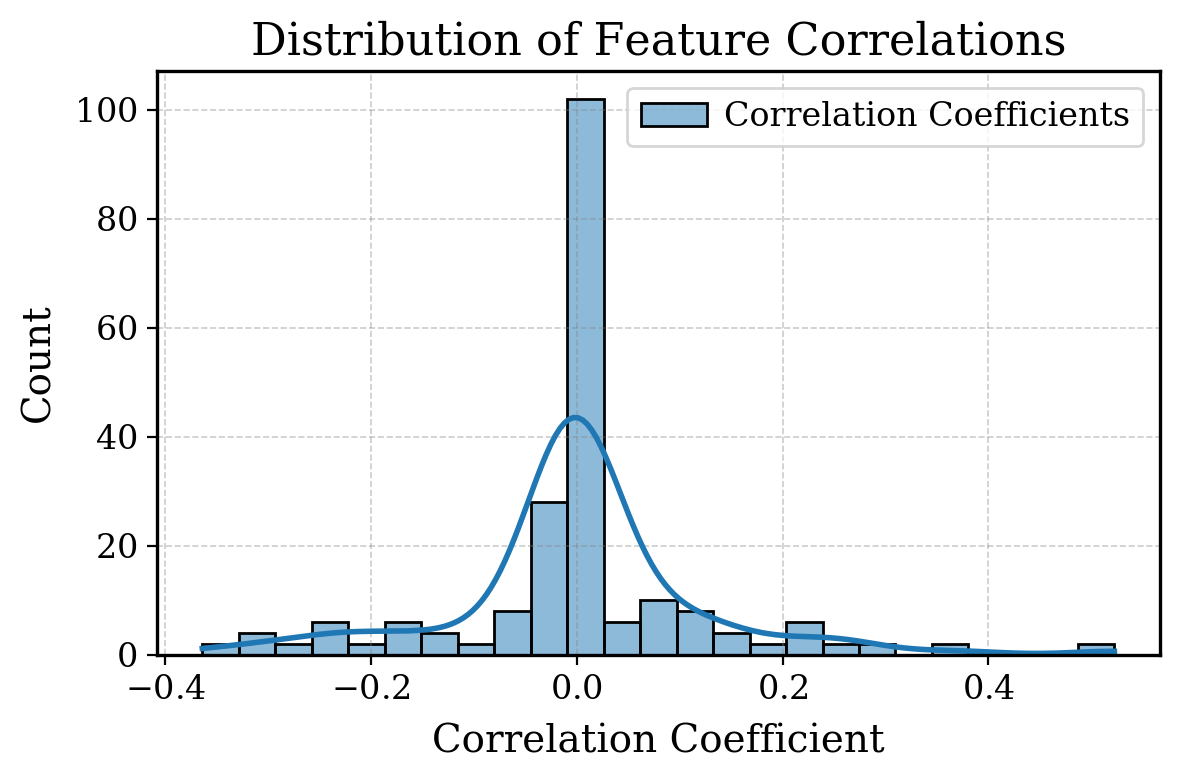

In [8]:
# Correlation distribution
correlation_values = subset_correlation.values.flatten()

# Remove self-correlations (1.0)
correlation_values = correlation_values[correlation_values != 1.0]

# Distribution function plot
plt.figure(figsize=(6, 4))
sns.histplot(correlation_values, bins=25, kde=True, label='Correlation Coefficients')
plt.legend()
plt.xlabel("Correlation Coefficient")
plt.ylabel("Count")
plt.title("Distribution of Feature Correlations")
plt.savefig("Figures/Correlation_Distribution_CDA.pdf")
plt.show()

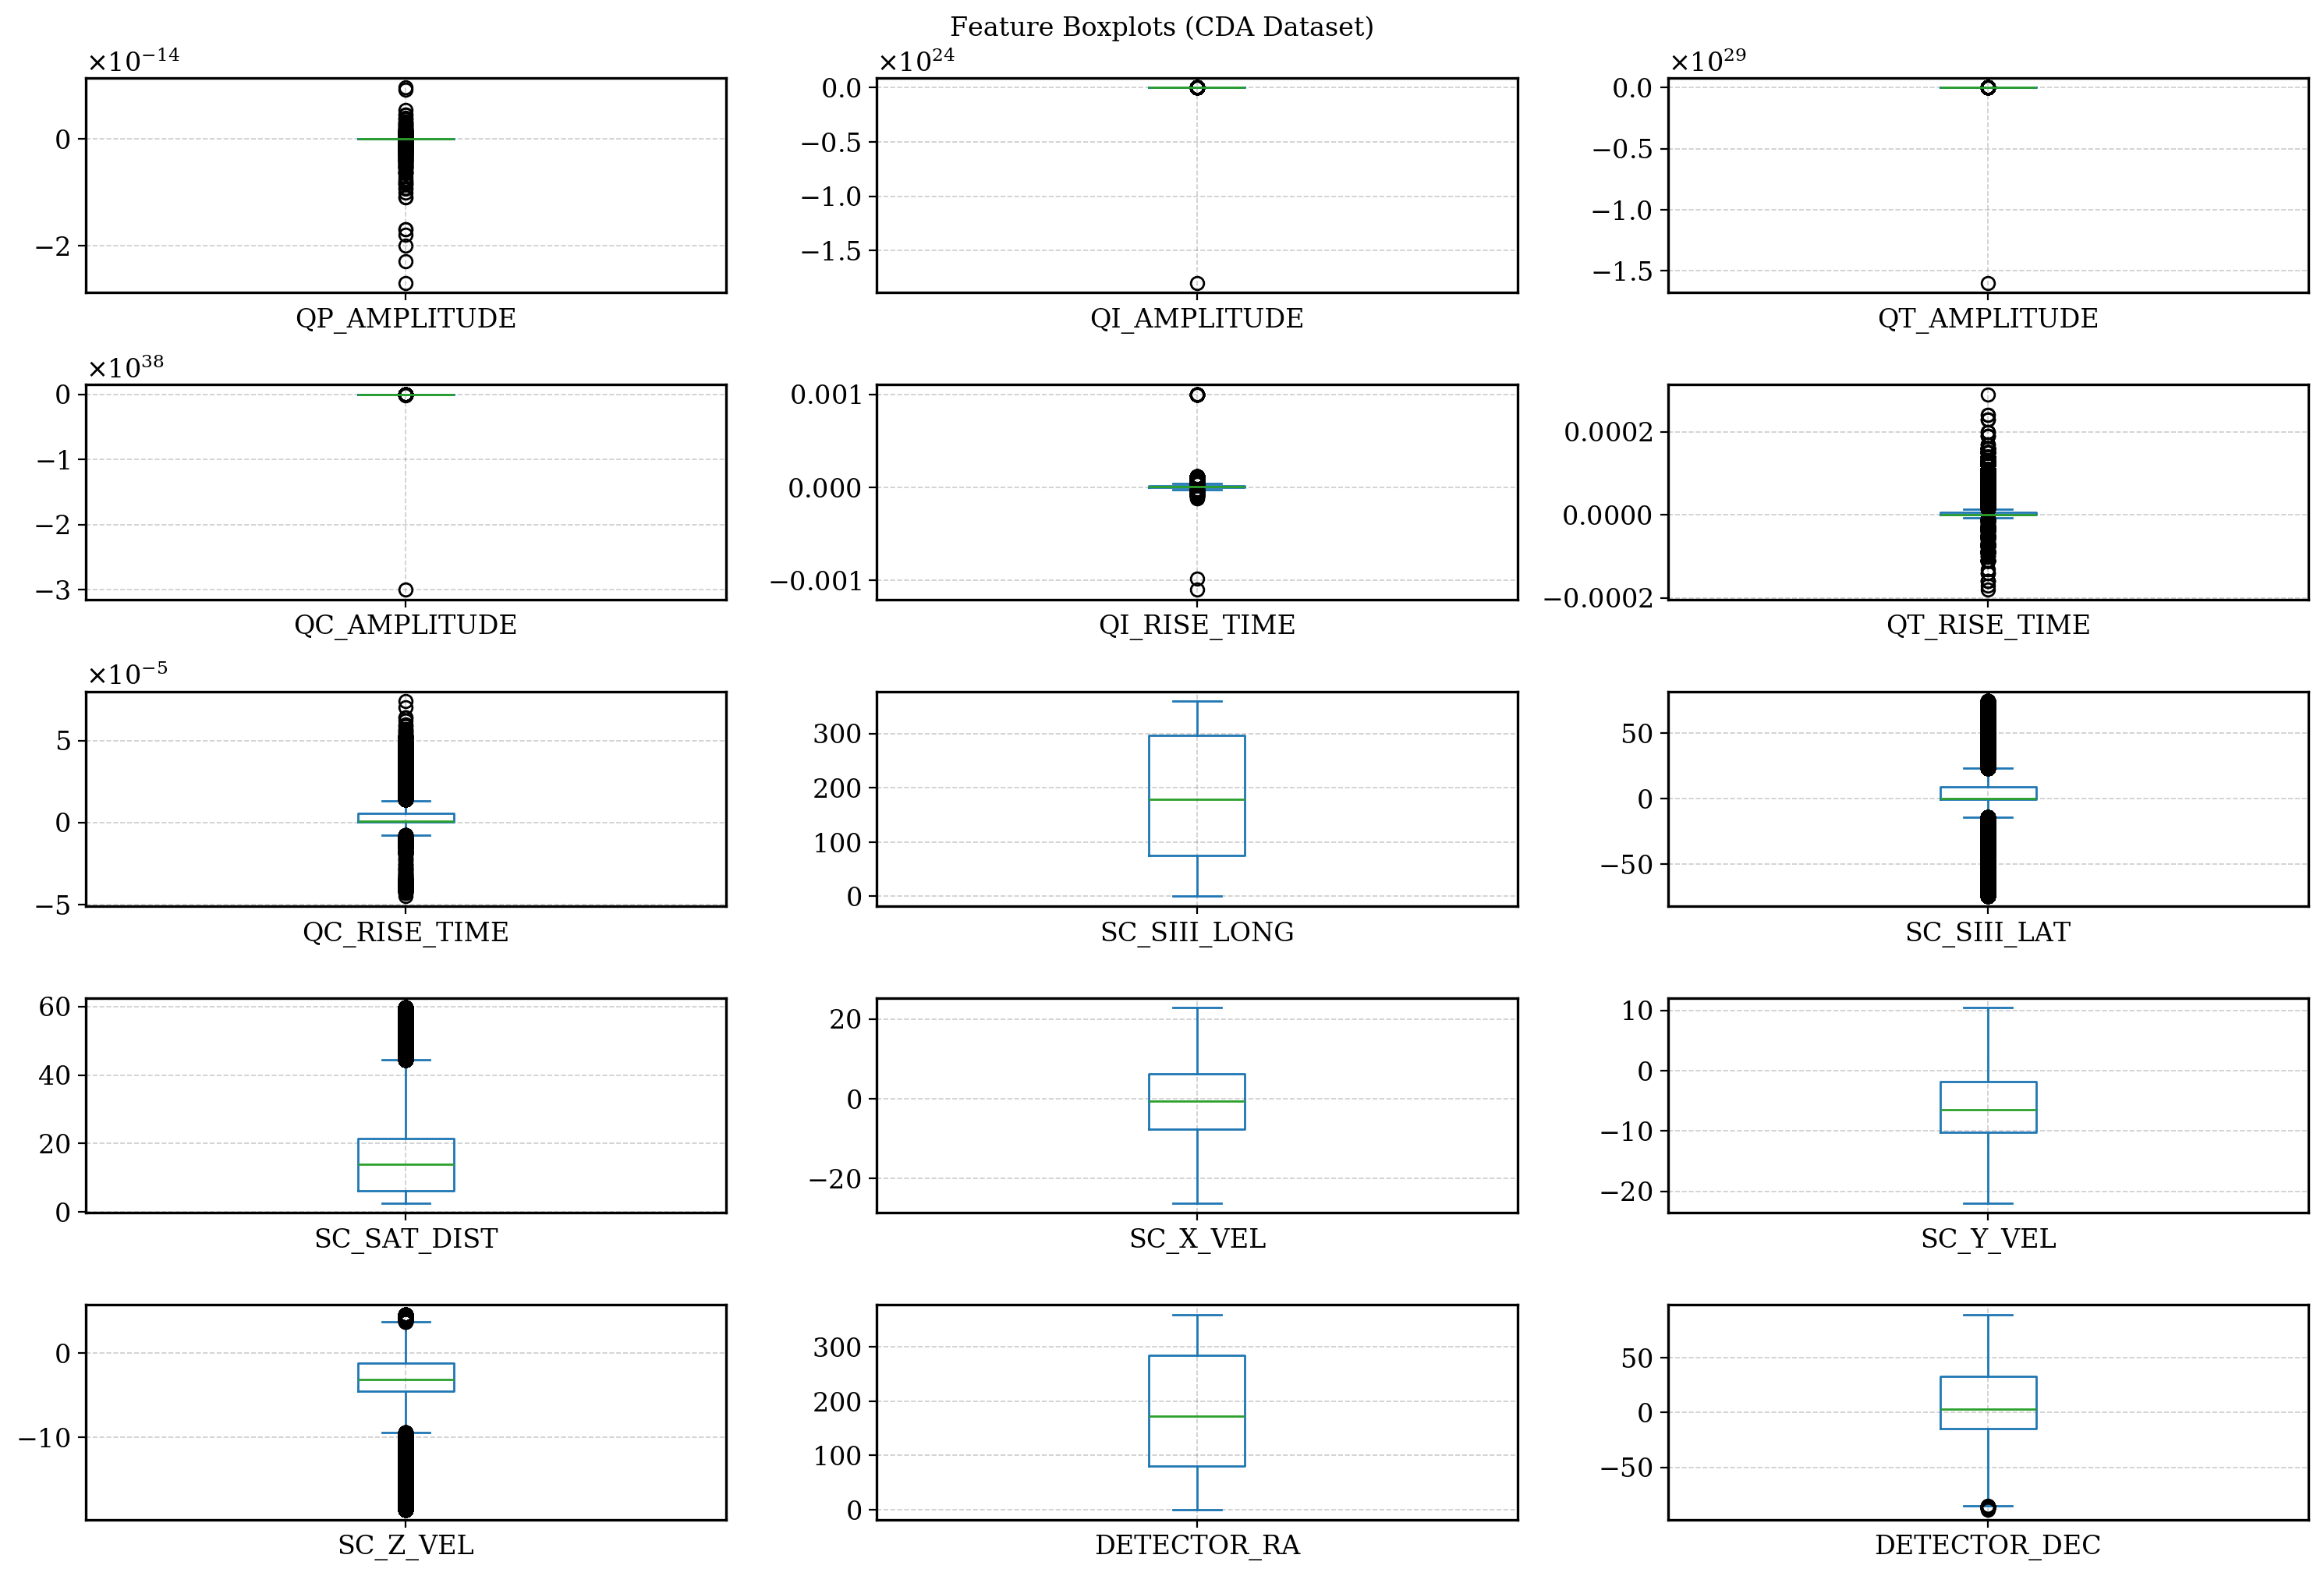

In [9]:
df[cols_of_interest].plot(kind='box', subplots=True, layout=(6, 3), figsize=(15, 12), sharex=False, sharey=False)
plt.suptitle("Feature Boxplots (CDA Dataset)")
plt.tight_layout()
plt.show()

Amplitude show some extreme outliers and distributions, rise times are moderately well behaved but with many outliers (noise?), SC parameters are generally well behaved with classic box shape and less dominant outliers. So now we analzye the amplitudes first

In [10]:
# Are the outliers all the same value?
amplitude_cols = ["QP_AMPLITUDE", "QI_AMPLITUDE", "QT_AMPLITUDE", "QC_AMPLITUDE"]
outlier_counts = {}

for col in amplitude_cols:
    series = df[col].dropna()
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col} outlier count: {outliers.count()} ")

QP_AMPLITUDE outlier count: 600 
QI_AMPLITUDE outlier count: 70317 
QT_AMPLITUDE outlier count: 82515 
QC_AMPLITUDE outlier count: 46117 


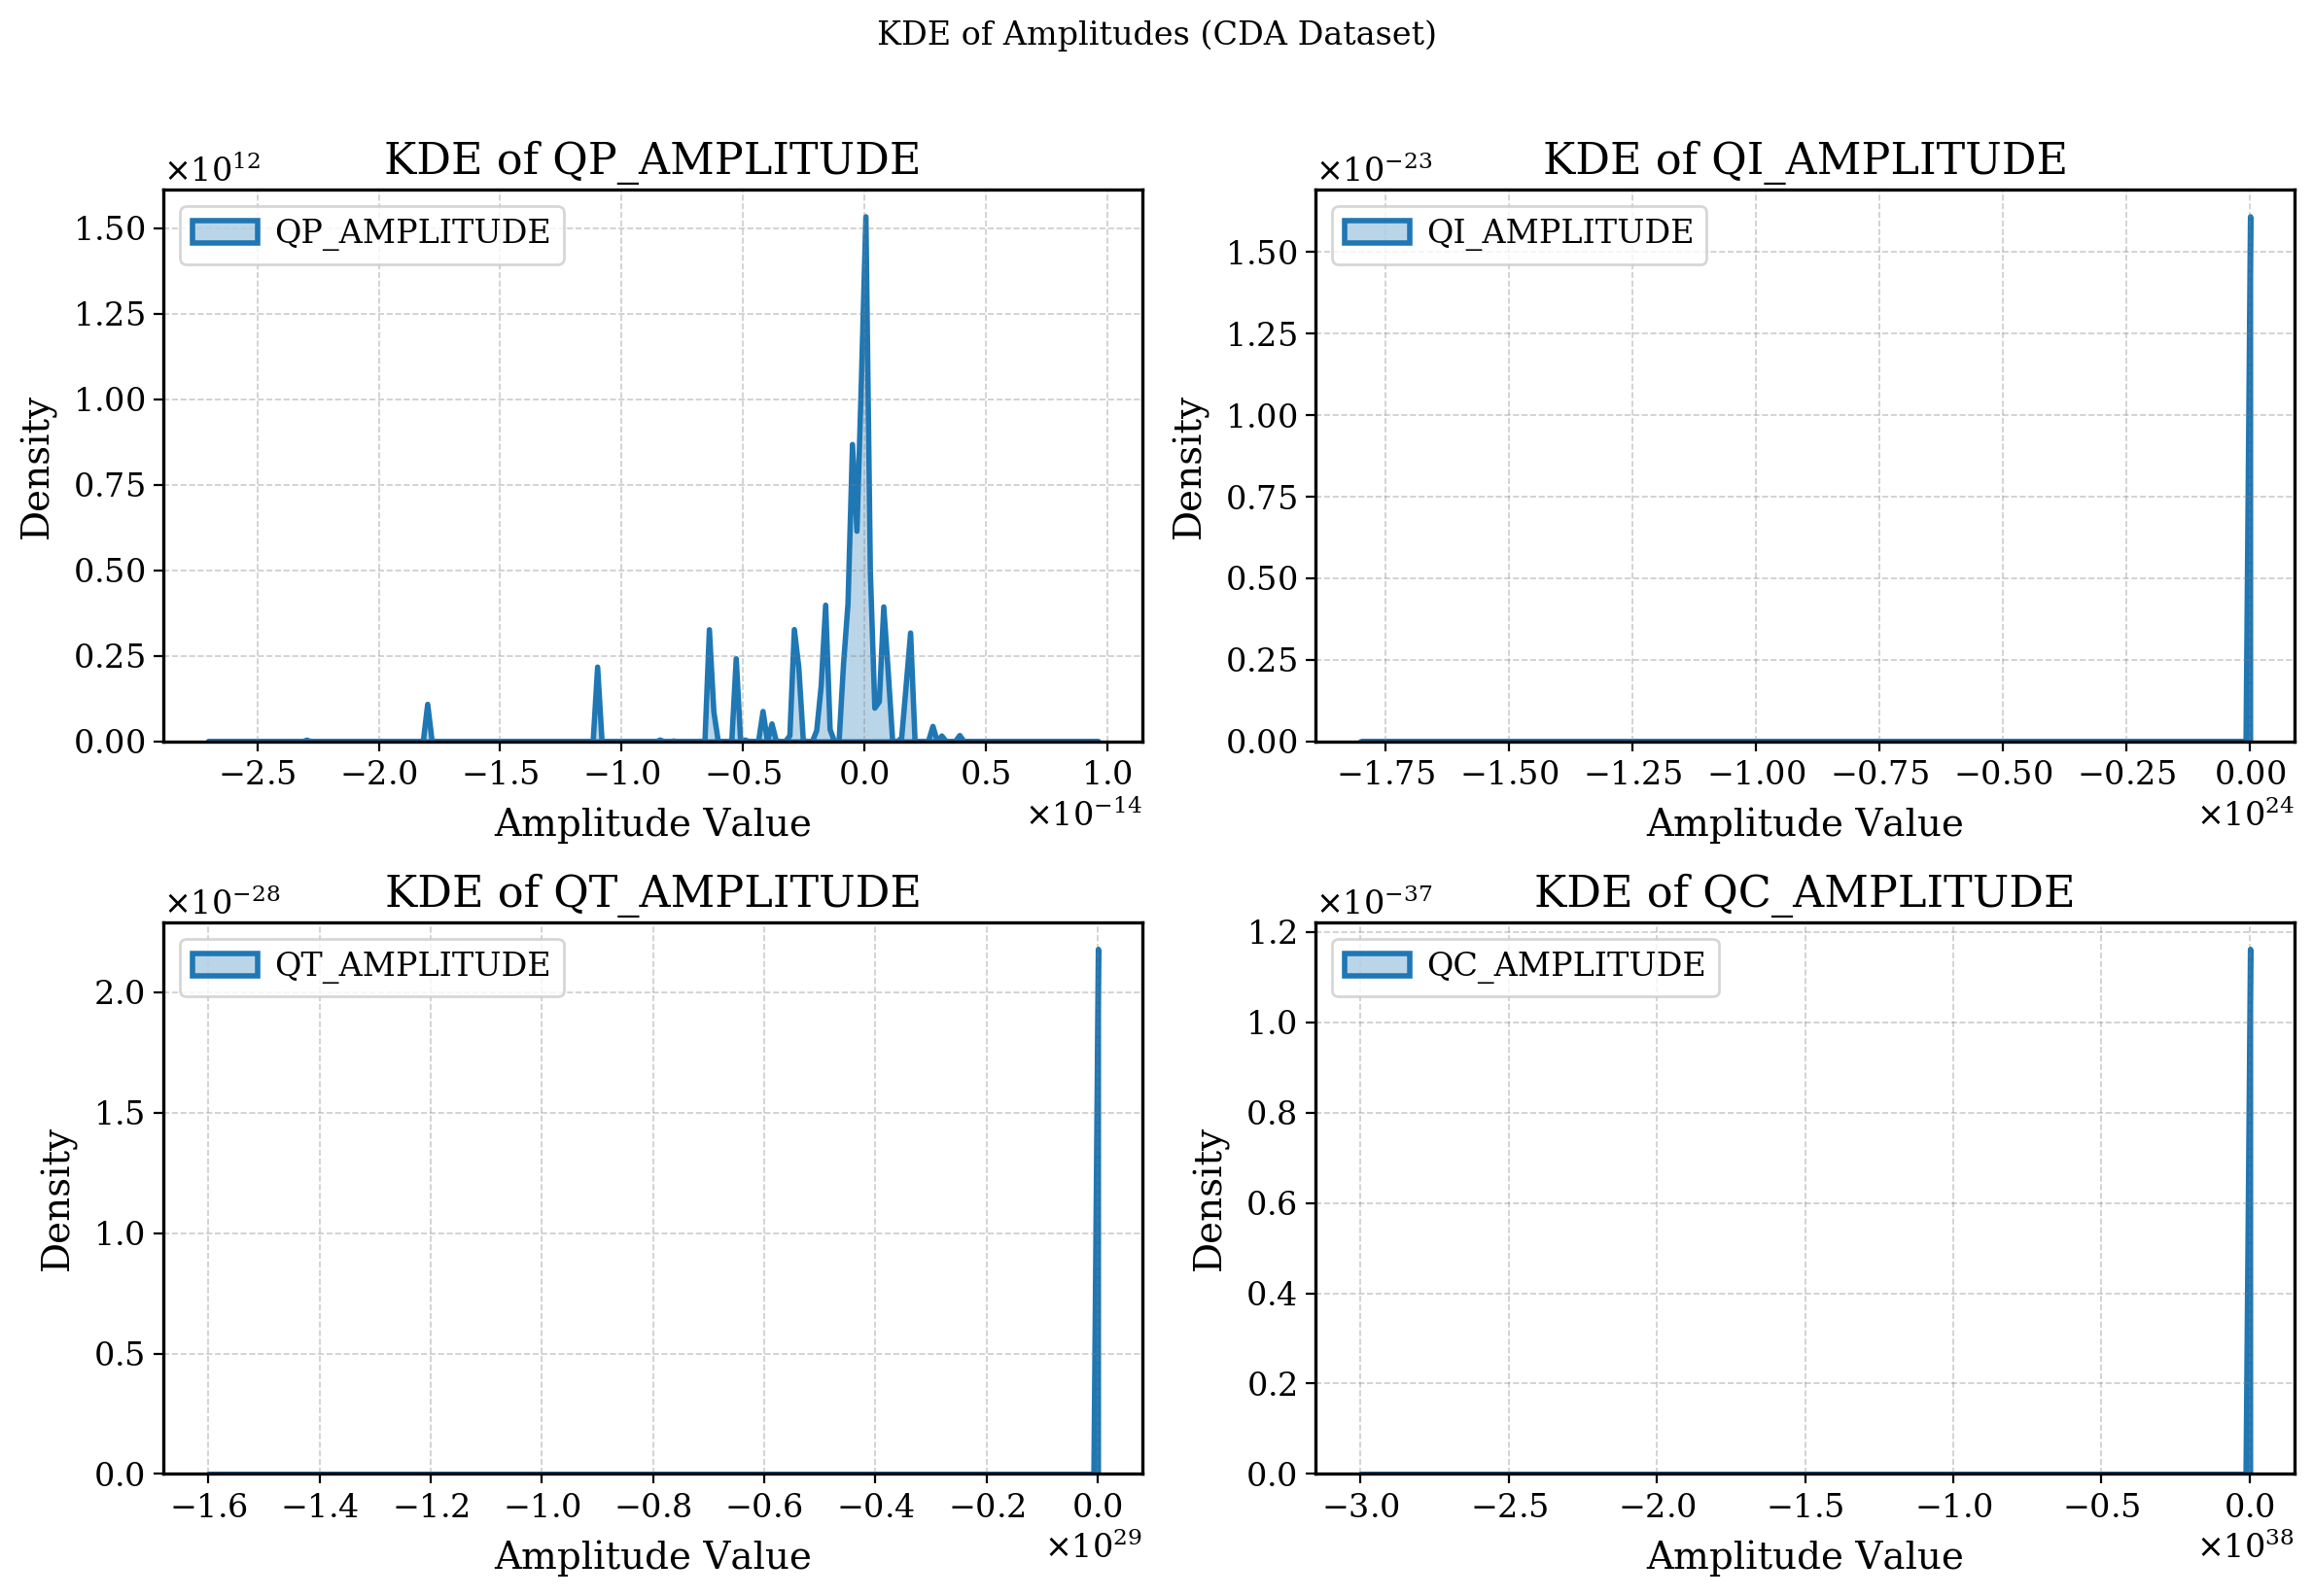

In [11]:
amplitude_cols = [
    "QP_AMPLITUDE",
    "QI_AMPLITUDE",
    "QT_AMPLITUDE",
    "QC_AMPLITUDE"
]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(amplitude_cols):
    ax = axs[i]
    # Trim only extreme lower and upper 0.1% (keep 99.8% of values)
    data = df[col].dropna()
    sns.kdeplot(data, label=col, fill=True, alpha=0.3, lw=2, ax=ax)
    ax.set_xlabel("Amplitude Value")
    ax.set_ylabel("Density")
    ax.set_title(f"KDE of {col}")
    ax.legend()

plt.suptitle("KDE of Amplitudes (CDA Dataset)", y=1.02)
plt.tight_layout()
plt.show()

C:\Users\jerem\AppData\Local\Temp\ipykernel_20340\3916737099.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, label=col, fill=True, alpha=0.3, lw=2, ax=ax)
C:\Users\jerem\AppData\Local\Temp\ipykernel_20340\3916737099.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


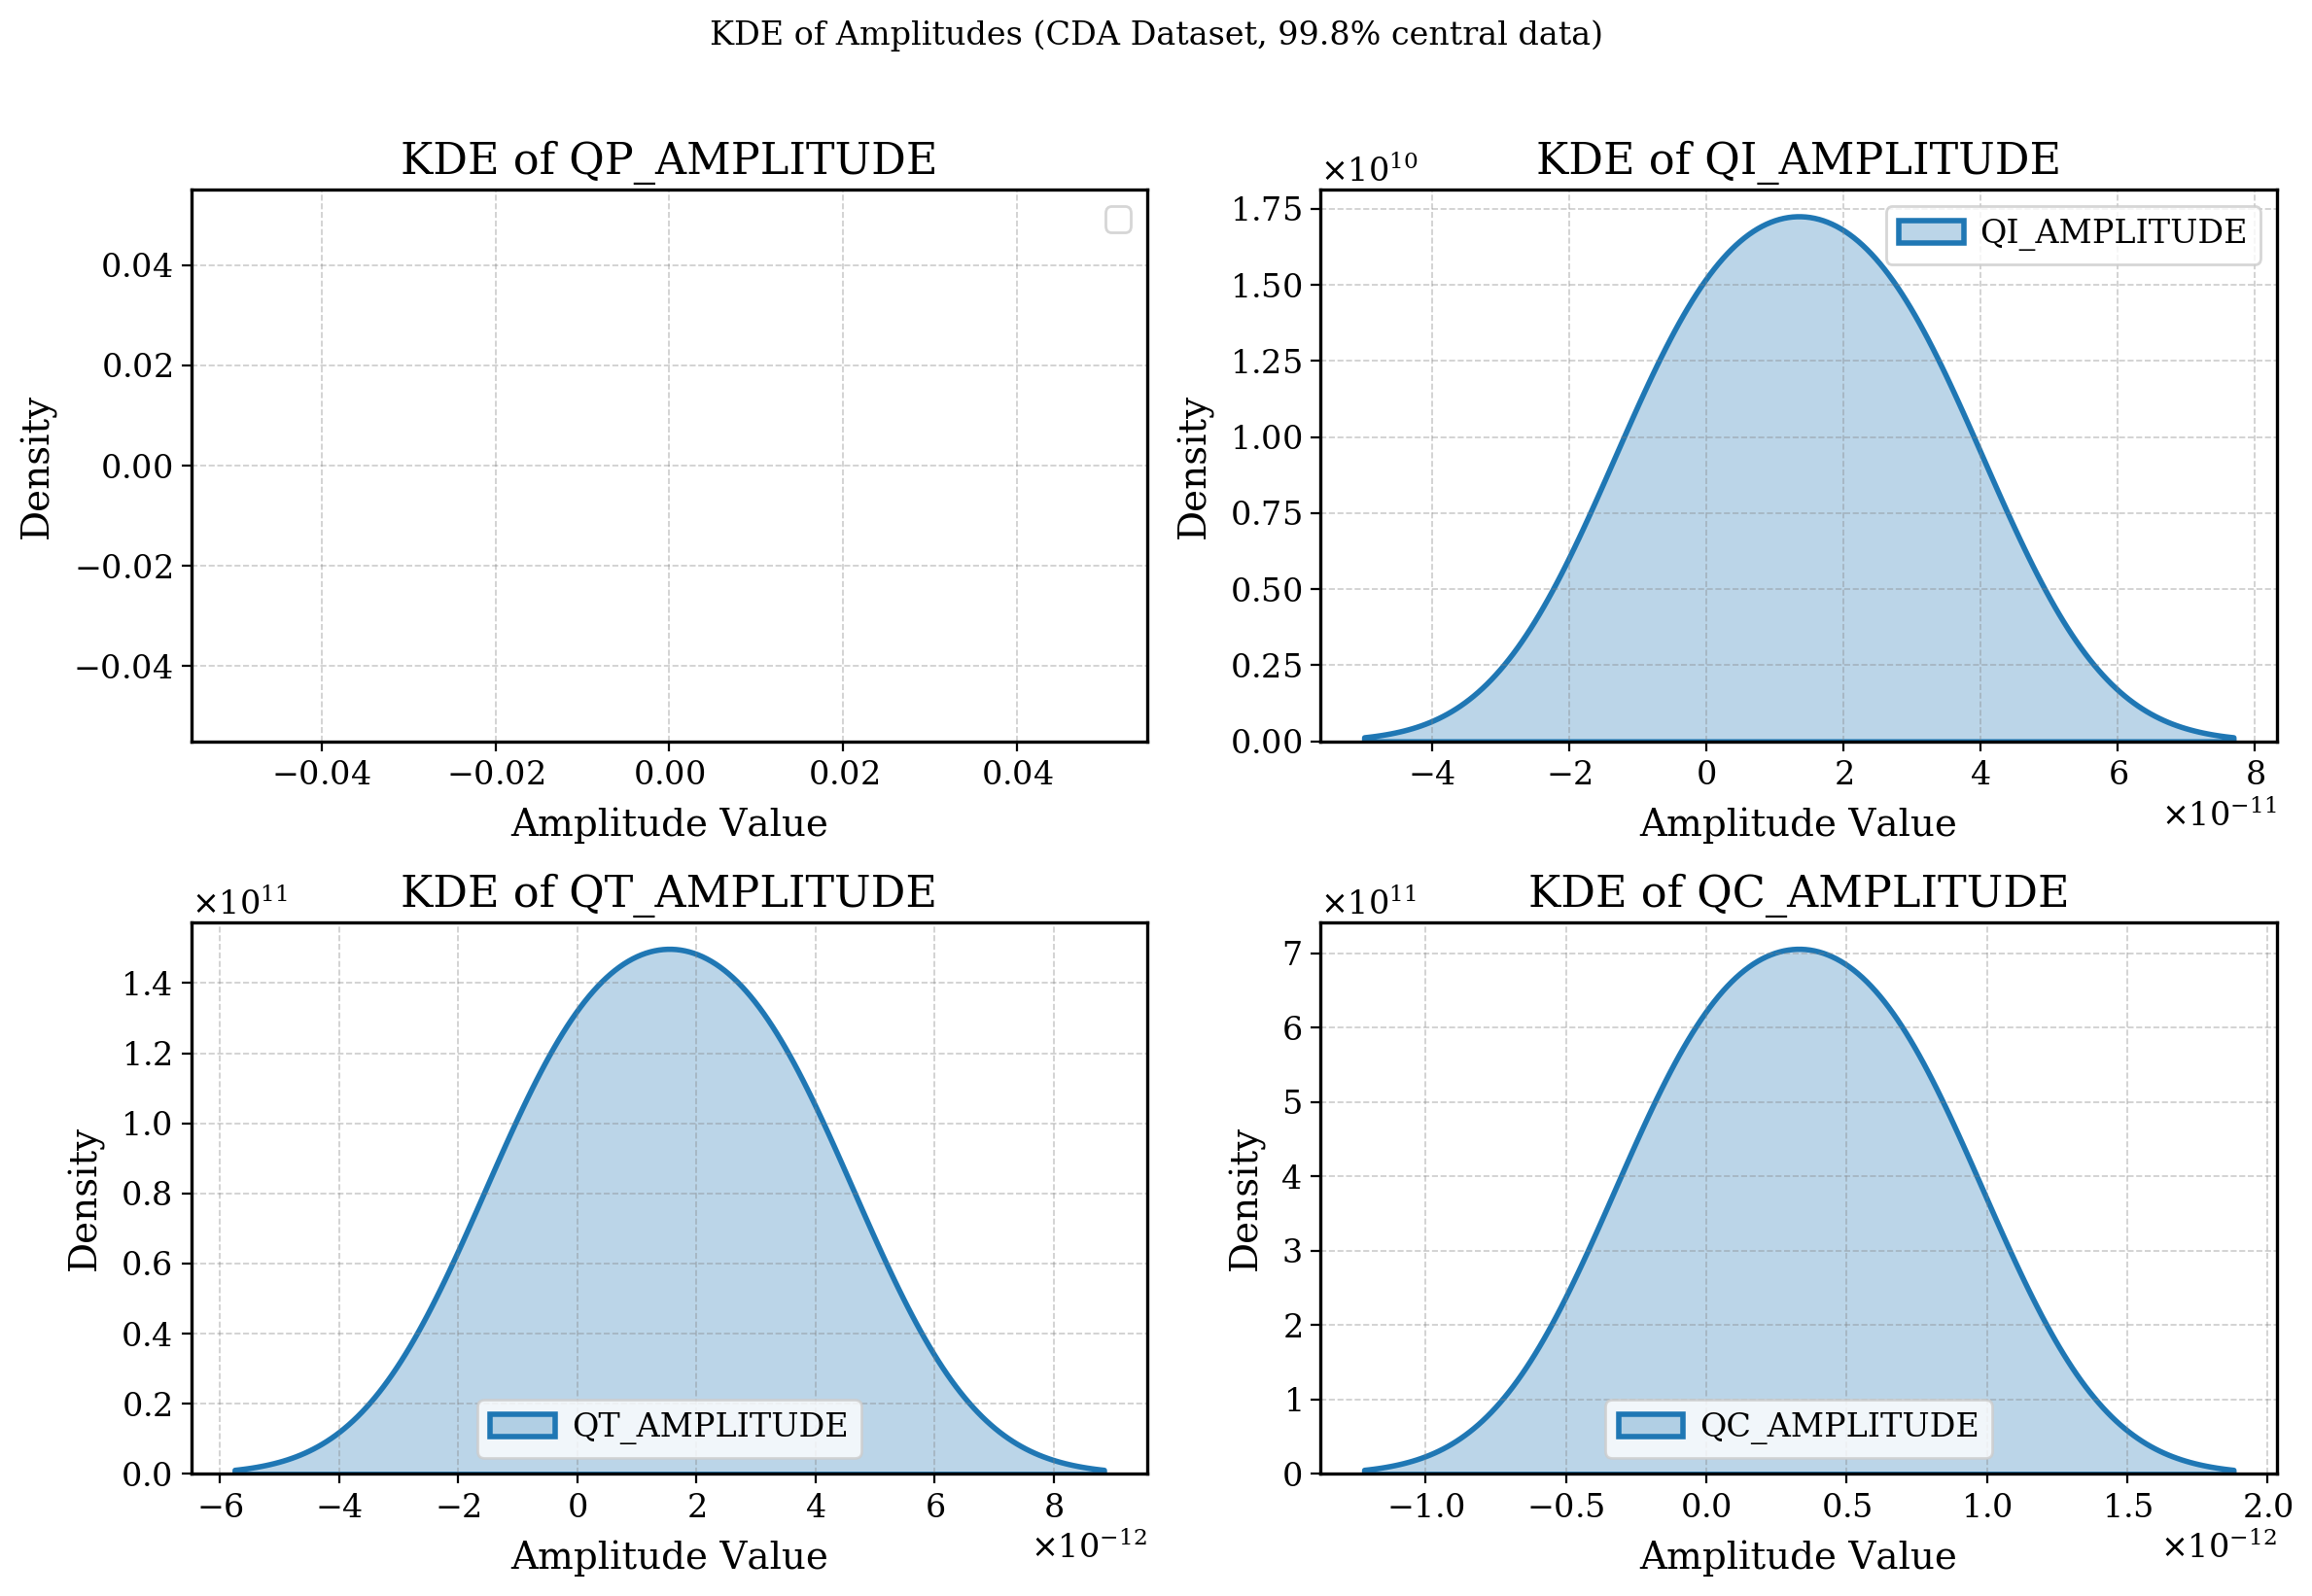

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(amplitude_cols):
    ax = axs[i]
    # Trim only extreme lower and upper 0.1% (keep 99.8% of values)
    data = df[col].dropna().quantile([0.01, 0.99])
    sns.kdeplot(data, label=col, fill=True, alpha=0.3, lw=2, ax=ax)
    ax.set_xlabel("Amplitude Value")
    ax.set_ylabel("Density")
    ax.set_title(f"KDE of {col}")
    ax.legend()

plt.suptitle("KDE of Amplitudes (CDA Dataset, 99.8% central data)", y=1.02)
plt.tight_layout()
plt.show()

We see that for three of the amplitudes we reach a normal distribution when rejecting 0.2% of the data. This is a big improvement. But what is wrong with the QP amplitude?

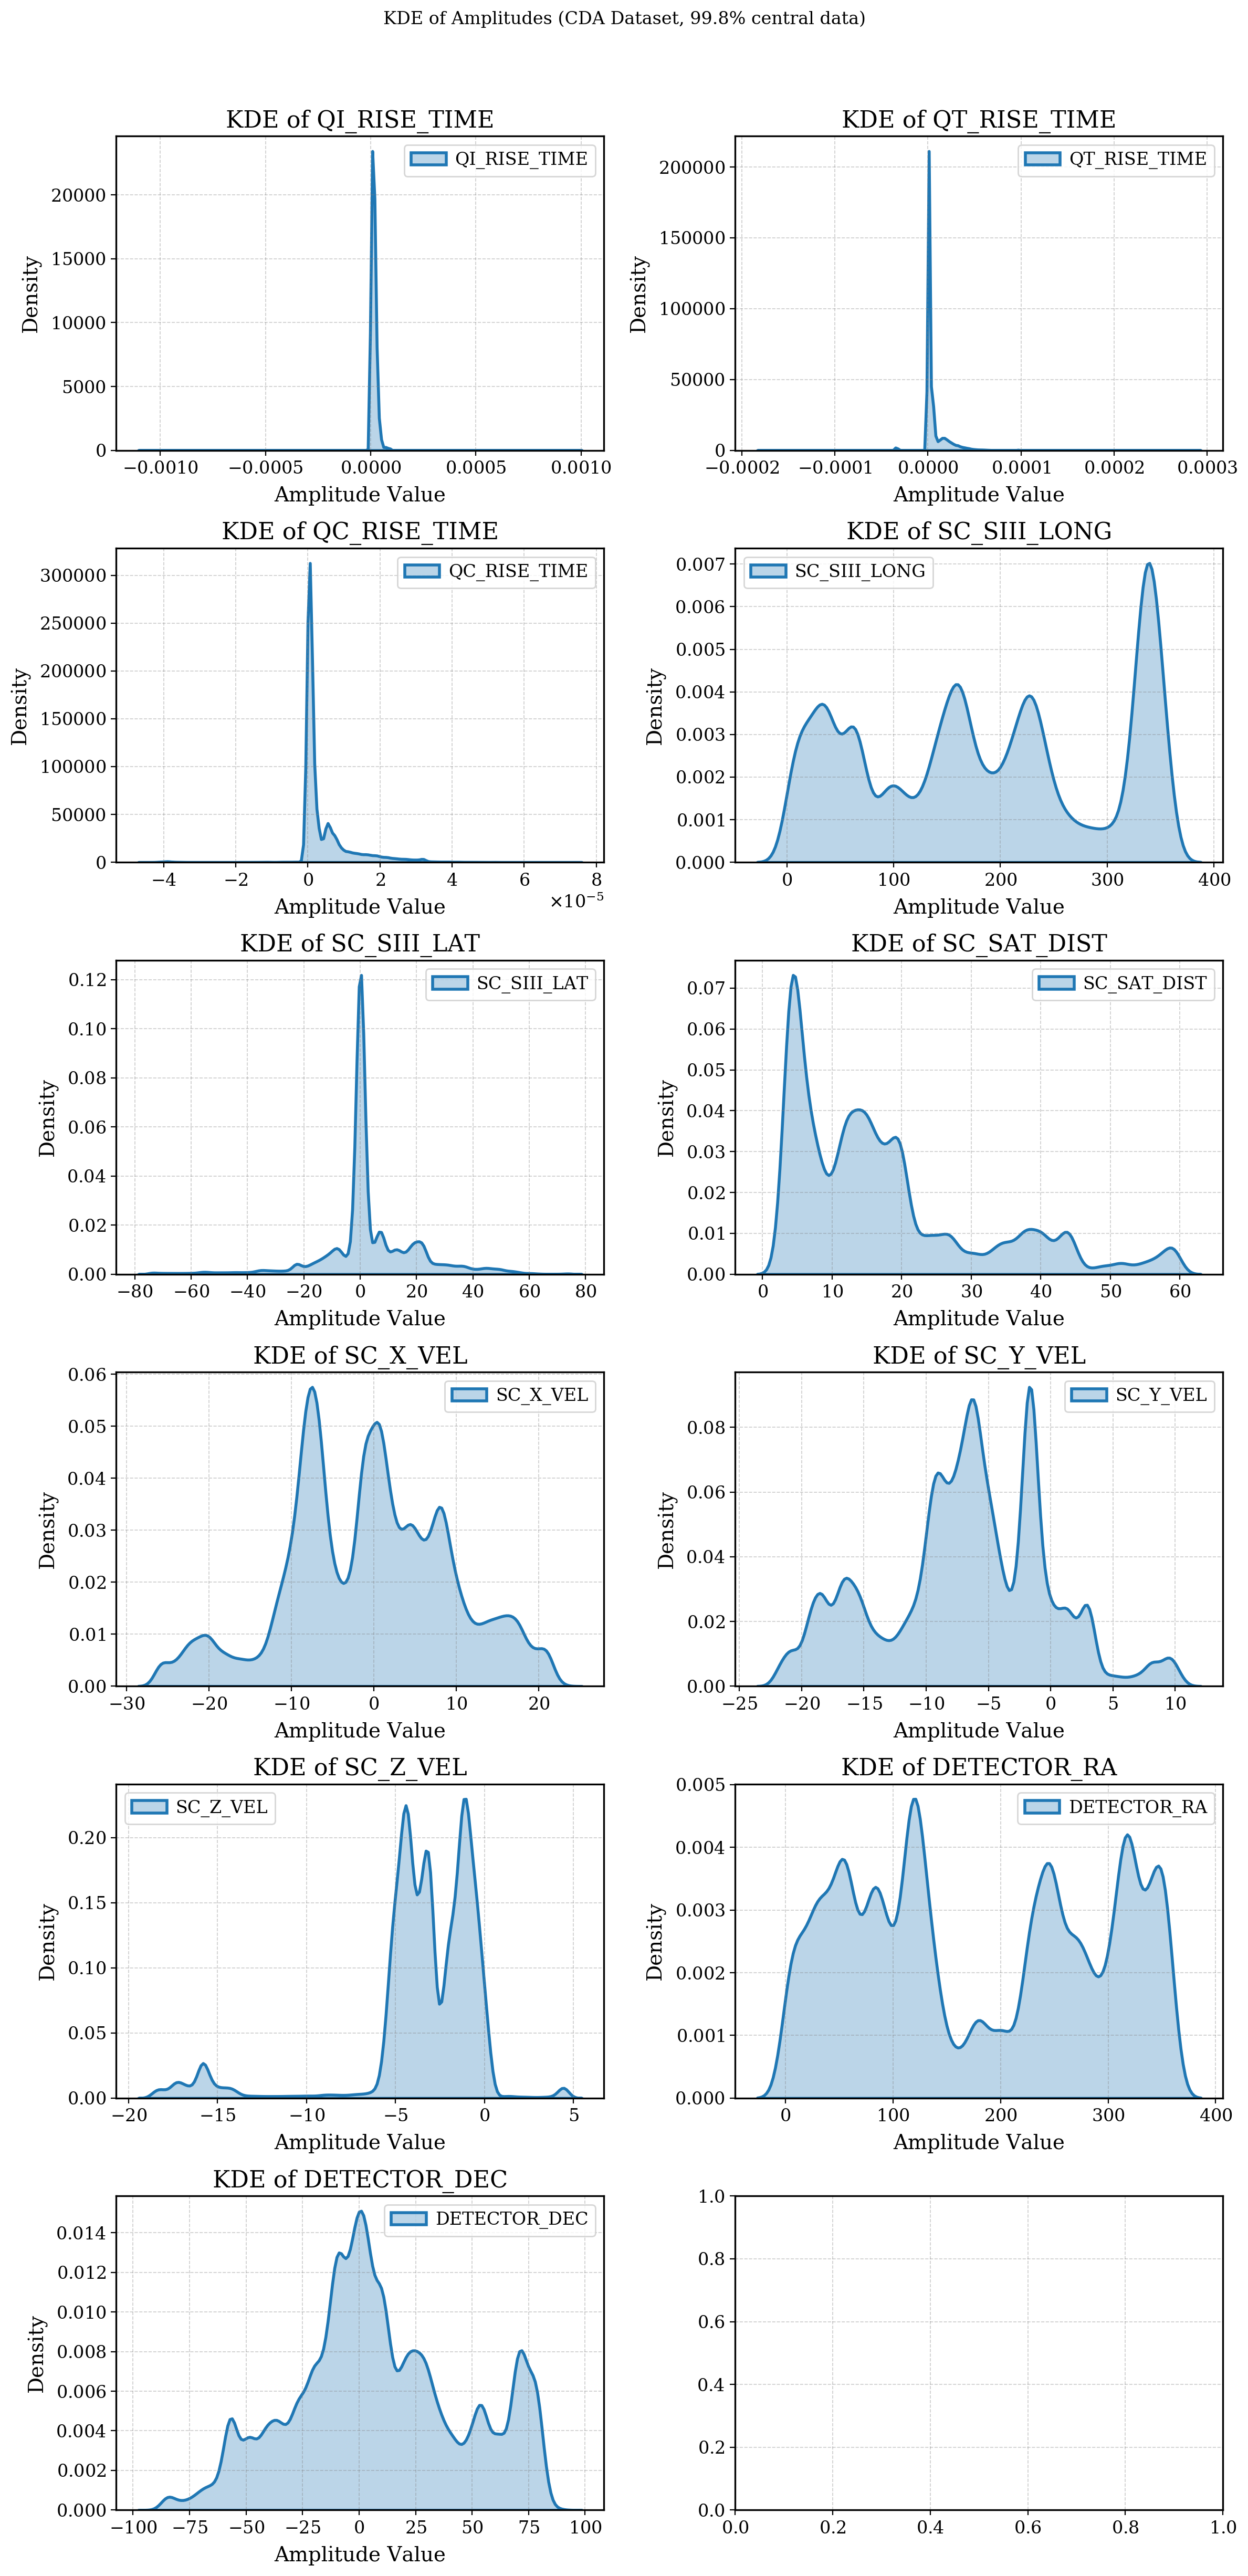

In [ ]:
regular_cols = [
    "QI_RISE_TIME",
    "QT_RISE_TIME",
    "QC_RISE_TIME",
    "SC_SIII_LONG",
    "SC_SIII_LAT",
    "SC_SAT_DIST",
    "SC_X_VEL",
    "SC_Y_VEL",
    "SC_Z_VEL",
    "DETECTOR_RA",
    "DETECTOR_DEC"
]

fig, axs = plt.subplots(6, 2, figsize=(12, 24))
axs = axs.flatten()
for i, col in enumerate(regular_cols):
    ax = axs[i]
    data = df[col].dropna()
    sns.kdeplot(data, label=col, fill=True, alpha=0.3, lw=2, ax=ax)
    ax.set_xlabel("Amplitude Value")
    ax.set_ylabel("Density")
    ax.set_title(f"KDE of {col}")
    ax.legend()

plt.suptitle("KDE of Amplitudes (CDA Dataset)", y=1.02)
plt.tight_layout()
plt.show()

These look good and physical